In [96]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [97]:
def parse_location(location_str):
    parts = location_str.split(',')
    city = parts[0].strip()
    country = parts[-1].strip()
    return city, country

In [113]:
path = "collaboration network.xlsx"

people_list_df = pd.read_excel(path, sheet_name='People list')
co_author_matrix = pd.read_excel(path, sheet_name='Co-author matrix')

col_auth = co_author_matrix.columns[1:]

co_auth_mat = co_author_matrix.to_numpy()
co_auth_mat = np.delete(co_auth_mat, 0, axis=1)
co_auth_mat = np.triu(co_auth_mat) + np.tril(co_auth_mat.T, -1)
co_auth_mat = co_auth_mat.astype(int)
co_author_matrix_df = pd.DataFrame(co_auth_mat, columns =col_auth)

co_author_matrix_df.reset_index(inplace=True, drop=True)

co_author_matrix_df.index = np.transpose(col_auth)
display(co_author_matrix_df.head(30))
#region - same country(2nd), different first part
#nation - same country(2nd)
#internation - different country(2nd)

,a001,a002,a003,a004,a005,a006,a007,a008,a009,a010,a011,a012,a013,a017,a018,a019,a020,a021,a026,a027,a028,a029,a030,a031,a032,a033,a034,a035,a036,a037,a038,a039,a040,a041,a042,a043,a044,a045,a046,a047,a048,a049,a050,a051,a052,a053,a054,a055,a056,a057,a058,a059,a060,a061,a062,a063,a064,a065,a066,a067,a068,a069,a070,a071,a072,a073,a074,a075,a076,a077,a078,a079,a080,a084,a085,a086,a087,a088,a089,a090,a091,a092,a093,a094,a095,a096,a097,a098,a099,a100,a101,a102,a103,a104,a105,a106,a107,a108,a109,a110,a111,a112,a113,a114,a115,a116
a001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a002,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a003,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a005,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a006,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
a007,0,0,0,0,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a008,0,0,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a009,0,0,0,0,0,0,0,0,0,2,1,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a010,0,0,0,0,0,0,0,0,2,0,1,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [115]:
people_list_df['City'], people_list_df['Country'] = zip(*people_list_df['Location of Institutional affiliation in Column E [City (State), Country]'].apply(parse_location))

people_list_df[['ID', 'City', 'Country']].head()

,ID,City,Country
0,a001,Amherst,USA
1,a002,Chestnut Hill (MA),USA
2,a003,Chestnut Hill (MA),USA
3,a004,Frankfurt,Germany
4,a005,Milan,Italy


In [116]:
author_id_to_city = dict(zip(people_list_df['ID'], people_list_df['City']))

#map the ids to the city
co_author_matrix_cities = co_author_matrix_df.rename(columns=author_id_to_city, index=author_id_to_city)
display(co_author_matrix_cities.head())

,Amherst,Chestnut Hill (MA),Chestnut Hill (MA),Frankfurt,Milan,Milan,New York,Bologna,Cologne,Cologne,Cologne,Cologne,Cambridge (MA),Los Angeles,Los Angeles,Los Angeles,Cambridge (MA),New Orleans,New York,Belém (PA),Fortaleza (CE),New York,Heidelberg,Evanston,Philadelphia (PA),Bloemfontein,Cologne,Evanston,Evanston,Evanston,Evanston,Bloomington (IN),Evanston,Melbourne,Melbourne,Melbourne,Melbourne,Turin,Turin,Curitiba (PR),Curitiba (PR),Curitiba (PR),Curitiba (PR),Chengdu,Chengdu,Boone (NC),Chengdu,Fribourg,Loughborough,Loughborough,Szeged,Dublin,Budapest,Milan,Geneva,Austin (TX),Samsun,Moscow,Moscow,Izmir,Izmir,Potsdam,Mannheim,Potsdam,Potsdam,Shenzhen,Shenzhen,Daejeon,Daejeon,Daejeon,Tehran,Tehran,Tehran,Bloemfontein,Amherst,Bologna,Bologna,Ramat Gan,Belo Horizonte (MG),Belo Horizonte (MG),Belo Horizonte (MG),Belo Horizonte (MG),Amsterdam,Amsterdam,Sydney,Melbourne,Sydney,Melbourne,Sydney,Hangzhou,Bremen,Boston,Chicago,Stanford,Wuhan,Kowloon,Münster,Münster,Seoul,Seoul,Seoul,Shanghai,Bergamo,Reggio Emilia,Rome,Gießen
Amherst,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chestnut Hill (MA),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chestnut Hill (MA),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Frankfurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Milan,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
#calculate for each author that was mapped to the city 
#combine multiple cities into unique names (pandas magic :D)
city_collaborations = co_author_matrix_cities.groupby(level=0).sum()
city_collaborations = city_collaborations.groupby(level=0, axis=1).sum()

#to compensate double calculations of city with itself from both sides (row and column)
corrected_city_collaborations = city_collaborations.copy()
np.fill_diagonal(corrected_city_collaborations.values, corrected_city_collaborations.values.diagonal() / 2)

#just to see clearly
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)

corrected_city_collaborations.head()

,Amherst,Amsterdam,Austin (TX),Belo Horizonte (MG),Belém (PA),Bergamo,Bloemfontein,Bloomington (IN),Bologna,Boone (NC),Boston,Bremen,Budapest,Cambridge (MA),Chengdu,Chestnut Hill (MA),Chicago,Cologne,Curitiba (PR),Daejeon,Dublin,Evanston,Fortaleza (CE),Frankfurt,Fribourg,Geneva,Gießen,Hangzhou,Heidelberg,Izmir,Kowloon,Los Angeles,Loughborough,Mannheim,Melbourne,Milan,Moscow,Münster,New Orleans,New York,Philadelphia (PA),Potsdam,Ramat Gan,Reggio Emilia,Rome,Samsun,Seoul,Shanghai,Shenzhen,Stanford,Sydney,Szeged,Tehran,Turin,Wuhan
Amherst,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amsterdam,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Austin (TX),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Belo Horizonte (MG),0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Belém (PA),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
df = people_list[['ID', 'Location of Institutional affiliation in Column E [City (State), Country]']]
def collaboration_level(id1, id2, df):
    if co_author_matrix_df.loc[id1, id2] > 0:
            
        location_id1 = df.loc[df['ID'] == id1, 'Location of Institutional affiliation in Column E [City (State), Country]'].iloc[0]
        location_id2 = df.loc[df['ID'] == id2, 'Location of Institutional affiliation in Column E [City (State), Country]'].iloc[0]
    
        country_id1 = location_id1.split(',')[1].strip()
        country_id2 = location_id2.split(',')[1].strip()
    
        if country_id1 != country_id2:
            return 'int'#international
    
        state_id1 = location_id1.split(',')[0].strip()
        state_id2 = location_id2.split(',')[0].strip()
    
        if state_id1 != state_id2:
            return 'nat'#national
    
        # At this point, we know country_id1 is equal to country_id2 and state_id1 is equal to state_id2
        return 'reg'#regional
    else:
        return '0'#no collaboration

In [118]:
collaboration_data =[]
for i in range(len(df['ID'])):
    for j in range(i, len(df['ID'])):
        id1 = df['ID'].iloc[i]
        id2 = df['ID'].iloc[j]
        collaboration_data.append([id1, id2, collaboration_level(id1, id2,df)])
        

collaboration_df = pd.DataFrame(collaboration_data, columns=['Author1_ID', 'Author2_ID', 'Collaboration Level'])
display(collaboration_df.head(15))

,Author1_ID,Author2_ID,Collaboration Level
0,a001,a001,0
1,a001,a002,0
2,a001,a003,0
3,a001,a004,0
4,a001,a005,0
5,a001,a006,0
6,a001,a007,0
7,a001,a008,0
8,a001,a009,0
9,a001,a010,0


In [120]:
collaboration_df['Collaboration Level'] = collaboration_df['Collaboration Level'].replace({'int': 3, 'nat': 2, 'reg': 1, '0': 0})

unique_ids = pd.unique(collaboration_df[['Author1_ID', 'Author2_ID']].values.ravel('K'))
adj_matrix = pd.DataFrame(0, index=unique_ids, columns=unique_ids)

# Fill the adjacency matrix
for _, row in collaboration_df.iterrows():
    adj_matrix.at[row['Author1_ID'], row['Author2_ID']] = row['Collaboration Level']
    adj_matrix.at[row['Author2_ID'], row['Author1_ID']] = row['Collaboration Level']  # Symmetry

mapping = {3: 'int', 2: 'nat', 1: 'reg', 0: '0'}

# Apply mapping to the adjacency matrix
adj_matrix = adj_matrix.replace(mapping)

collaboration_adj = adj_matrix
display(collaboration_adj.head(15))

,a001,a002,a003,a004,a005,a006,a007,a008,a009,a010,a011,a012,a013,a017,a018,a019,a020,a021,a026,a027,a028,a029,a030,a031,a032,a033,a034,a035,a036,a037,a038,a039,a040,a041,a042,a043,a044,a045,a046,a047,a048,a049,a050,a051,a052,a053,a054,a055,a056,a057,a058,a059,a060,a061,a062,a063,a064,a065,a066,a067,a068,a069,a070,a071,a072,a073,a074,a075,a076,a077,a078,a079,a080,a084,a085,a086,a087,a088,a089,a090,a091,a092,a093,a094,a095,a096,a097,a098,a099,a100,a101,a102,a103,a104,a105,a106,a107,a108,a109,a110,a111,a112,a113,a114,a115,a116
a001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,reg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a002,0,0,reg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a003,0,reg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a005,0,0,0,0,0,reg,int,nat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a006,0,0,0,0,reg,0,int,nat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,int,int,int,0,0,0,0,0,0,0,0,0,0,0,0
a007,0,0,0,0,int,int,0,int,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a008,0,0,0,0,nat,nat,int,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,int,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,reg,reg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a009,0,0,0,0,0,0,0,0,0,reg,reg,reg,int,0,0,0,int,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a010,0,0,0,0,0,0,0,0,reg,0,reg,reg,int,0,0,0,int,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


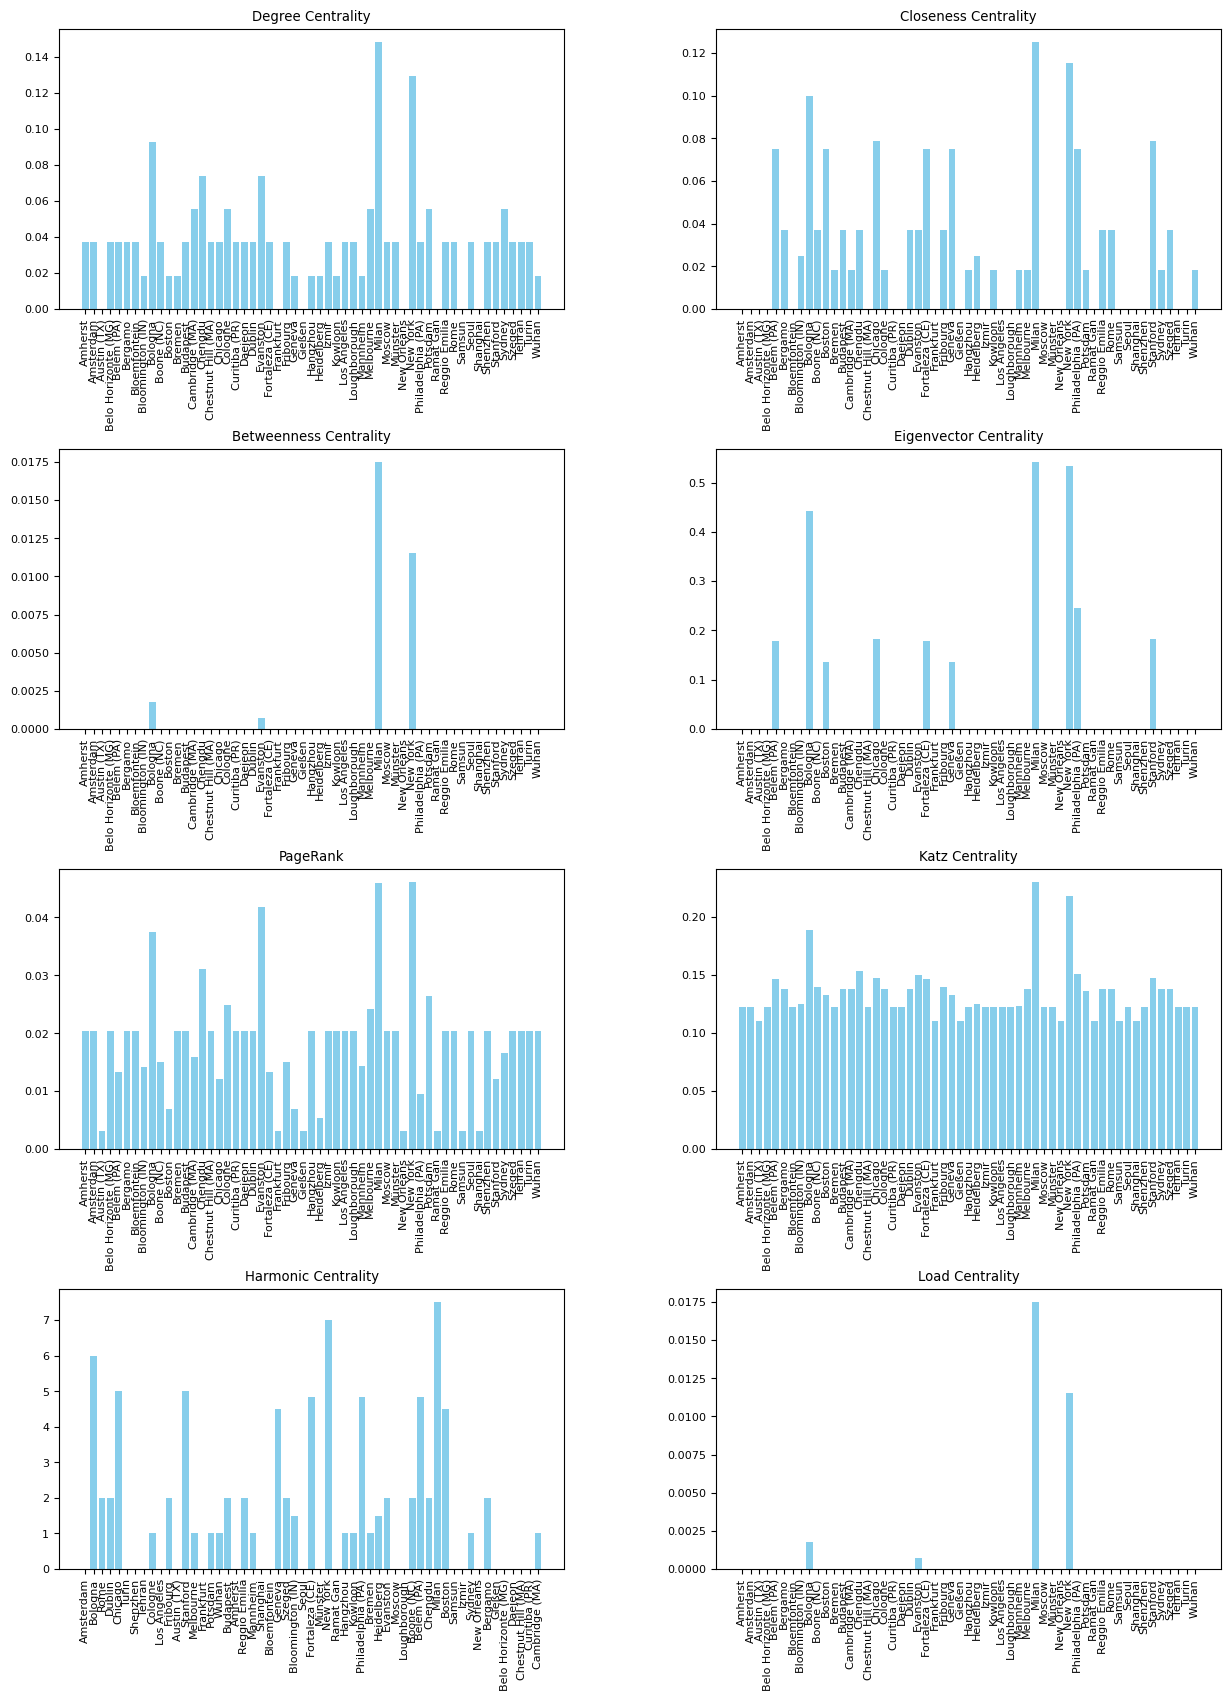

In [105]:
G_cities = nx.from_pandas_adjacency(corrected_city_collaborations)

city_network_metrics = {
    'Degree Centrality': nx.degree_centrality(G_cities),
    'Closeness Centrality': nx.closeness_centrality(G_cities),
    'Betweenness Centrality': nx.betweenness_centrality(G_cities),
    'Eigenvector Centrality': nx.eigenvector_centrality(G_cities),
    'PageRank': nx.pagerank(G_cities),
    'Katz Centrality': nx.katz_centrality(G_cities, alpha=0.1, beta=1.0),  # Default parameters
    'Harmonic Centrality': nx.harmonic_centrality(G_cities),
    'Load Centrality': nx.load_centrality(G_cities)
}

city_network_metrics_df = pd.DataFrame(city_network_metrics)

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axes = axes.flatten()



for i, (metric_name, values) in enumerate(city_network_metrics.items()):
    axes[i].bar(values.keys(), values.values(), color='skyblue')
    axes[i].set_title(metric_name)
    axes[i].tick_params(axis='x', rotation=90)
    
plt.rcParams.update({'font.size': 8})
    
plt.show()

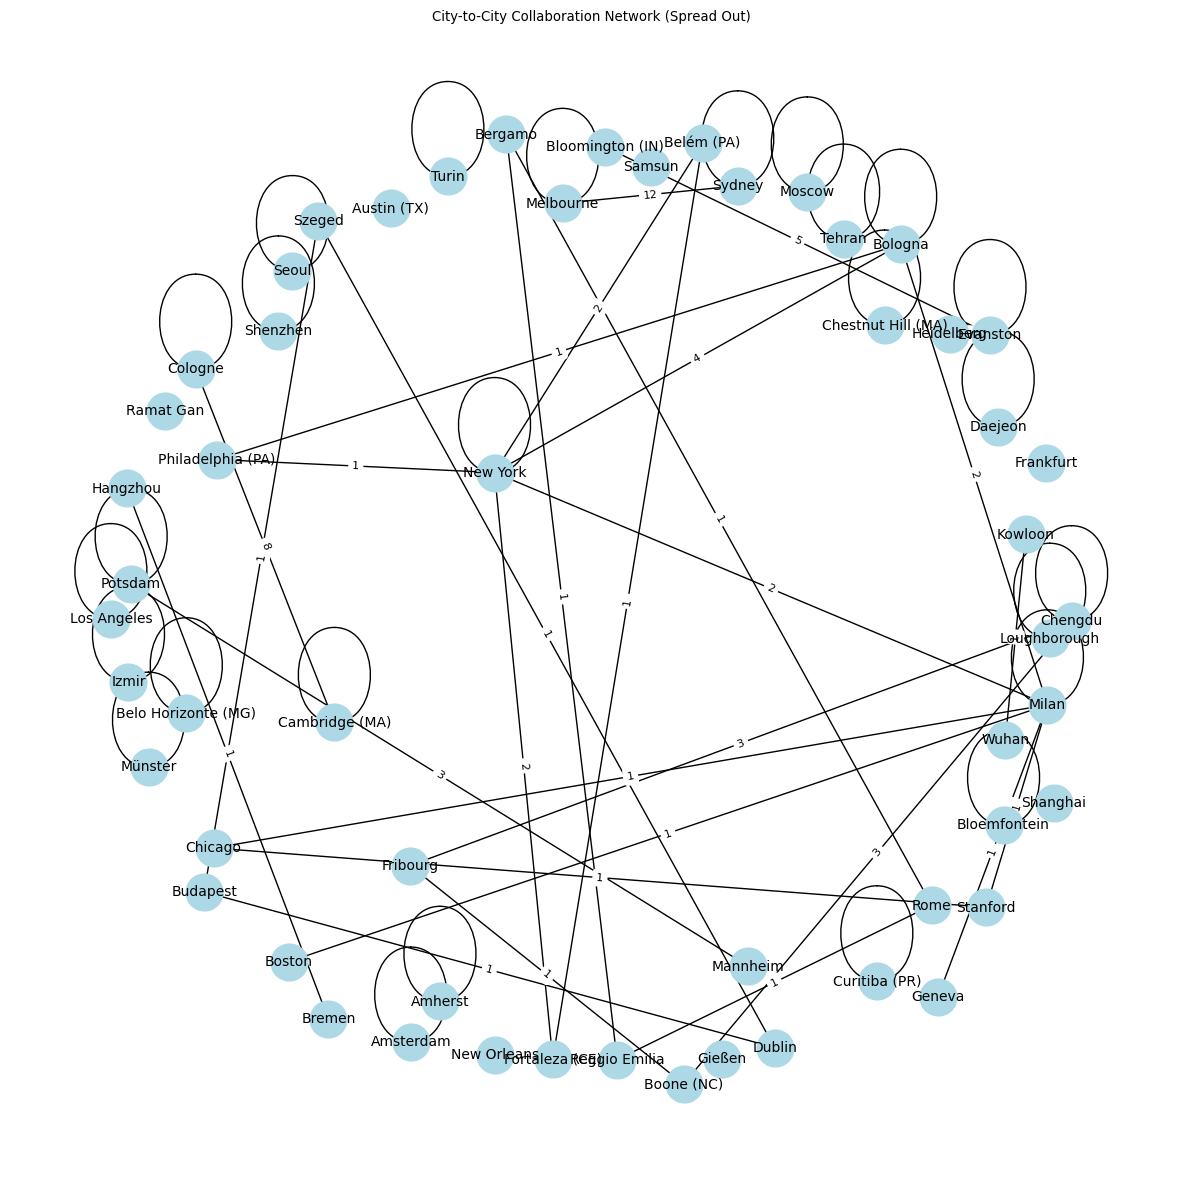

In [106]:
for u, v, d in G_cities.edges(data=True):
    d['weight'] = corrected_city_collaborations.loc[u, v]


pos_spread = nx.spring_layout(G_cities, k=2)  # 'k' controls the distance between nodes

# Drawing the adjusted network
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_cities, pos_spread, node_size=700, node_color='lightblue')
nx.draw_networkx_labels(G_cities, pos_spread, font_size=10)
nx.draw_networkx_edges(G_cities, pos_spread, width=1)
nx.draw_networkx_edge_labels(G_cities, pos_spread, edge_labels=edge_weights, font_size=8)

plt.title("City-to-City Collaboration Network (Spread Out)")
plt.axis('off')
plt.show()

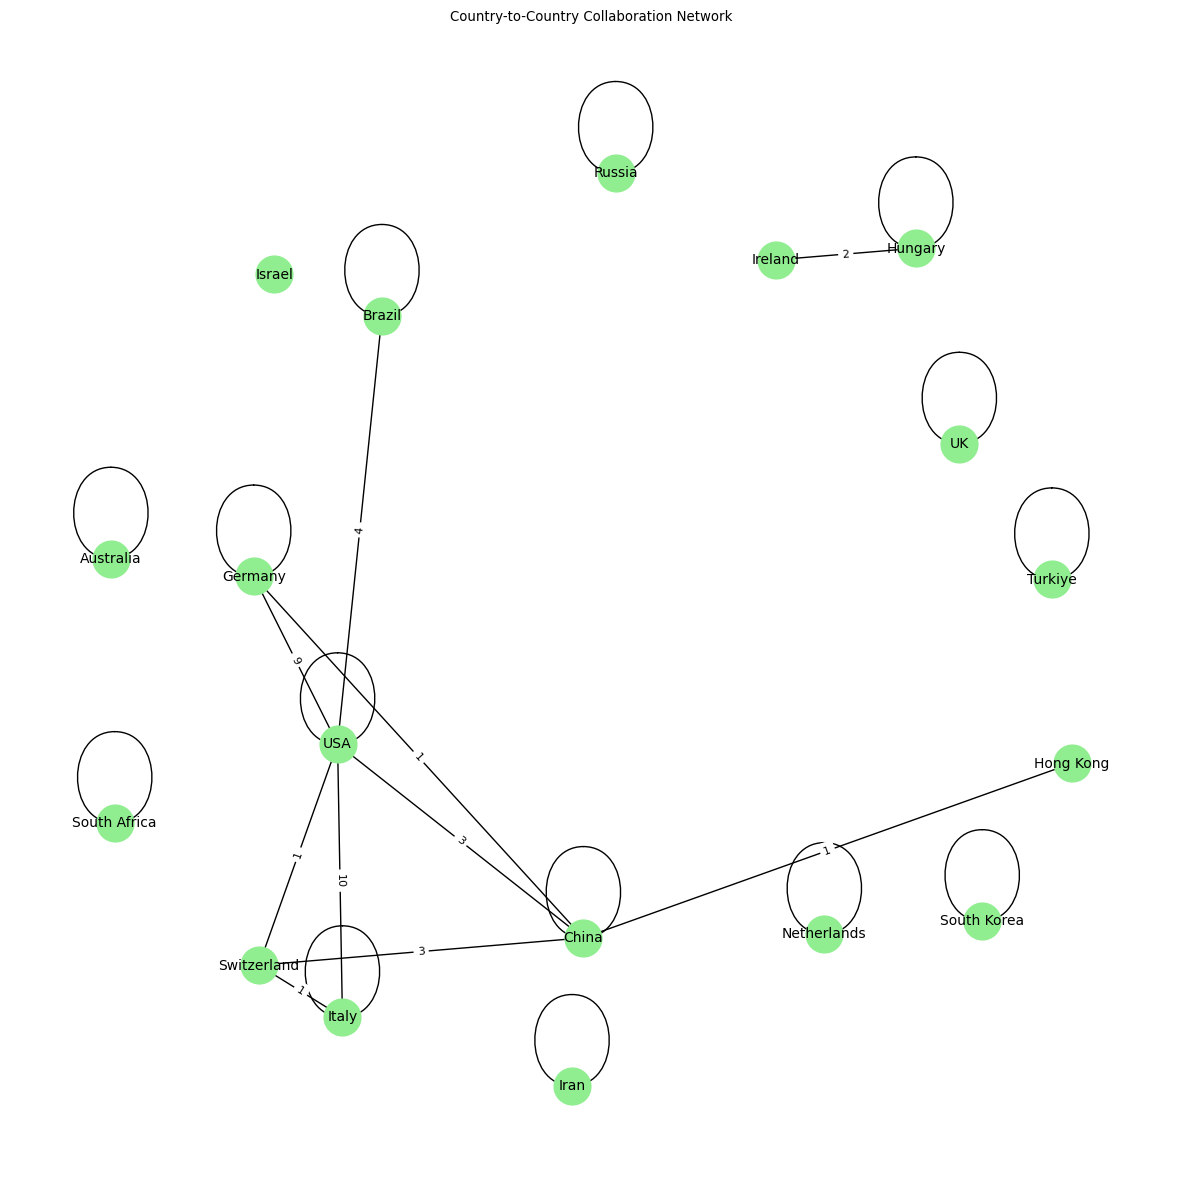

In [107]:
author_id_to_country = dict(zip(people_list_df['ID'], people_list_df['Country']))
co_author_matrix_countries = co_author_matrix_df.rename(columns=author_id_to_country, index=author_id_to_country)

country_collaborations = co_author_matrix_countries.groupby(level=0).sum()
country_collaborations = country_collaborations.groupby(level=0, axis=1).sum()

corrected_country_collaborations = country_collaborations.copy()
np.fill_diagonal(corrected_country_collaborations.values, corrected_country_collaborations.values.diagonal() / 2)

G_countries = nx.from_pandas_adjacency(corrected_country_collaborations)

for u, v, d in G_countries.edges(data=True):
    d['weight'] = corrected_country_collaborations.loc[u, v]

plt.figure(figsize=(15, 15))
pos_countries = nx.spring_layout(G_countries, k=2)  # 'k' controls the distance between nodes
edge_weights_countries = nx.get_edge_attributes(G_countries, 'weight')

nx.draw_networkx_nodes(G_countries, pos_countries, node_size=700, node_color='lightgreen')
nx.draw_networkx_labels(G_countries, pos_countries, font_size=10)
nx.draw_networkx_edges(G_countries, pos_countries, width=1)
nx.draw_networkx_edge_labels(G_countries, pos_countries, edge_labels=edge_weights_countries, font_size=8)

plt.title("Country-to-Country Collaboration Network")
plt.axis('off')
plt.show()


/var/folders/l3/249n0dwd6lg5g6shdxx7150h0000gn/T/ipykernel_76840/3715489475.py:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for neighbor_city, collaborations in data.iteritems():


<Figure size 1500x1500 with 0 Axes>

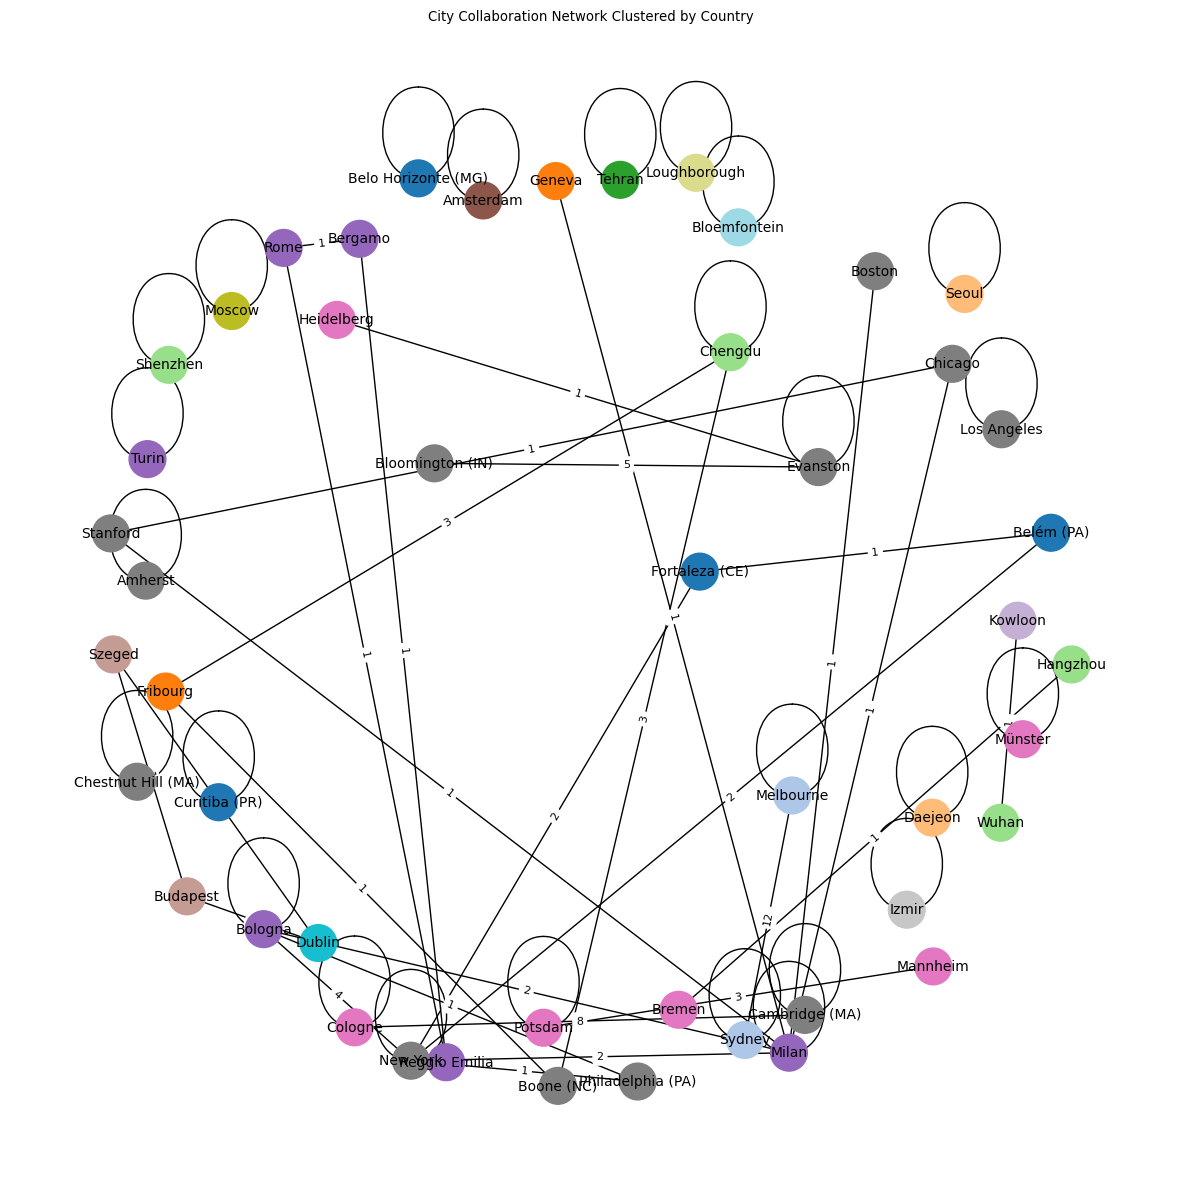

In [132]:
# Creating a new graph with nodes representing cities, but grouping them by countries
city_to_country = dict(zip(people_list_df['City'], people_list_df['Country']))

# Initialize a new graph
G_cities_clustered = nx.Graph()

# Add nodes and edges to the graph with city nodes clustered by country
for city, data in corrected_city_collaborations.iterrows():
    country = city_to_country.get(city)
    for neighbor_city, collaborations in data.iteritems():
        if collaborations > 0 and neighbor_city in city_to_country:
            neighbor_country = city_to_country[neighbor_city]
            G_cities_clustered.add_edge(city, neighbor_city, weight=collaborations, country=country, neighbor_country=neighbor_country)

plt.figure(figsize=(15, 15))
pos_clustered = nx.spring_layout(G_cities_clustered, k=2)  # k is for the distance between nodes

# Assigning a unique color to each country
unique_countries = list(set(city_to_country.values()))
country_colors = {country: i for i, country in enumerate(unique_countries)}

# Color nodes based on their country
node_color_clustered = [country_colors[city_to_country[node]] if node in city_to_country else 0 for node in G_cities_clustered.nodes()]

# Drawing the network with cities clustered by countries
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_cities_clustered, pos_clustered, node_size=700, node_color=node_color_clustered, cmap=plt.cm.tab20)
nx.draw_networkx_labels(G_cities_clustered, pos_clustered, font_size=10)
nx.draw_networkx_edges(G_cities_clustered, pos_clustered, width=1)
nx.draw_networkx_edge_labels(G_cities_clustered, pos_clustered, edge_labels=edge_weights_clustered, font_size=8)

plt.title("City Collaboration Network Clustered by Country")
plt.axis('off')
plt.show()
